In [1]:
!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 KB 13.7 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

2023-08-02 18:53:12.913638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-02 18:53:13.148471: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-08-02 18:53:13.148502: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-08-02 18:53:13.187975: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-08-02 18:53:17.357218: W tensorflow/stream_executor/platform/de

## Loading models from TensorFlow Hub

Here you can choose the pre-trained HRNet model to load, different models means a different training dataset used. All models have the same architecture, except for the model head, which has a different dimension based on the number of classes contained in the training dataset (dataset_output_classes). For more information about the different datasets we refer to the links above and the [factors of influence dataset collection](https://github.com/google-research/google-research/tree/master/factors_of_influence).

In [3]:
#@title Choose a pre-trained HRNet model to load.

hrnet_model_name = 'ade20k-hrnetv2-w48/1'  #@param ["ade20k-hrnetv2-w48/1", "isprs-hrnetv2-w48/1", "vkitti2-hrnetv2-w48/1", "vgallery-hrnetv2-w48/1", "sunrgbd-hrnetv2-w48/1", "suim-hrnetv2-w48/1", "scannet-hrnetv2-w48/1", "pvoc-hrnetv2-w48/1", "msegpcontext-hrnetv2-w48/1", "mapillary-hrnetv2-w48/1", "kitti-hrnetv2-w48/1", "isaid-hrnetv2-w48/1", "idd-hrnetv2-w48/1", "coco-hrnetv2-w48/1", "city-hrnetv2-w48/1", "camvid-hrnetv2-w48/1", "bdd-hrnetv2-w48/1"]

tfhub_model_name = 'https://tfhub.dev/google/HRNet/' + hrnet_model_name

print('HRNet model selected           :', tfhub_model_name)

HRNet model selected           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


In [4]:
hrnet_model = hub.load(tfhub_model_name)

print('HRNet model loaded           :', tfhub_model_name)

HRNet model loaded           : https://tfhub.dev/google/HRNet/ade20k-hrnetv2-w48/1


## Loading an image and running inference

This is a demonstration on how to run inference for extracting features and predictions from an image. The image was taken from the scene150 dataset.

To perform inference on the datasets that were used during training we refer to the [factors of influence dataset collection](https://github.com/google-research/google-research/tree/master/factors_of_influence).

In [5]:
from PIL import Image
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.preprocessing.image import img_to_array


In [6]:
def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

<class 'tensorflow.python.framework.ops.EagerTensor'>
Saved as Super Resolution.jpg


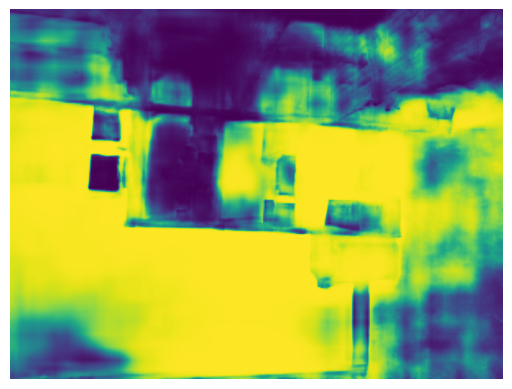

In [7]:
def preddd():

    image = Image.open(r"/work/temp.jpg")
    MAX_SIZE = (1200, 1200)
    image.thumbnail(MAX_SIZE)
    image = image.save("/work/temp.jpg")

    img = np.array(Image.open('/work/temp.jpg'))/255.0
    predictions = hrnet_model.predict([img])
    j = predictions[0,:,:,1]
    print(type(j))
    fake_image = tf.squeeze(j)
    save_image(tf.squeeze(fake_image), filename="Super Resolution")
    plt.imshow(predictions[0,:,:,1])
    plt.axis('off')
    plt.savefig('Super Resolution.jpg',bbox_inches='tight',transparent=True, pad_inches=0)
    


preddd()

In [8]:
!pip install anvil-uplink

import anvil.server



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=c5689703c0255f4407ee003af06864caf345e1926188f792e846d55c07c64c19
  Stored in directory: /root/.cache/pip/wheels/e8/9d/fd/0a594a1bc8d493935d319ac40d64d79f5b4117ef4d37b1b678
Successfully built ws4py
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [9]:
import anvil.media 
import io
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import save_img
from tensorflow.keras.preprocessing.image import img_to_array

In [10]:
def presddd():
    print("Inside function")
    img = np.array(Image.open('temp.jpg'))/255.0
    predictions = hrnet_model.predict([img])

In [ ]:
anvil.server.connect("SXDDKUN5U5N3UKGF3AJVEBS2-OC5F5G7XUXGOWM2E")

@anvil.server.callable
def super(file):
    print("Hit")
    with anvil.media.TempFile(file) as f:
        img = load_img(f)
        img_array = img_to_array(img)
        save_img('/work/temp.jpg', img_array)
        print("Starting")
        preddd()
        super_img = Image.open("/work/Untitled-project/Super Resolution.jpg")
        #super_img = Image.open("Super Resolution.jpg")
        name='super_img'
        bs = io.BytesIO()
        super_img.save(bs, format="JPEG")
        print("Done")

    return anvil.BlobMedia("image/jpg", bs.getvalue(), name=name)

anvil.server.wait_forever()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER
Hit
Starting
<class 'tensorflow.python.framework.ops.EagerTensor'>
Saved as Super Resolution.jpg
Done
Hit
Starting
<class 'tensorflow.python.framework.ops.EagerTensor'>
Saved as Super Resolution.jpg
Done


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8f7f3cc6-4bab-4271-b6bd-030e289f69ce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>